# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(['type']).count()['ride_id']

# 2. Get the total drivers for each city type
sum_drivers_by_city_type = city_data_df.groupby(['type']).sum()['driver_count']

#  3. Get the total amount of fares for each city type
sum_fares_by_city_type = pyber_data_df.groupby(['type']).sum()['fare']

#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = pyber_data_df.groupby(['type']).mean()['fare']

# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = sum_fares_by_city_type / sum_drivers_by_city_type

In [4]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_dict = {
    'Total Rides': total_rides_by_city_type,
    'Total Drivers': sum_drivers_by_city_type,
    'Total Fares': sum_fares_by_city_type,
    'Average Fare per Ride': avg_fare_per_ride,
    'Average Fare per Driver': avg_fare_per_driver
}

pyber_summary_df = pd.DataFrame(pyber_summary_dict)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [5]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [6]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,.0f}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,.0f}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)

In [7]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [8]:
# 1. Read the merged DataFrame

# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_type_df = pyber_data_df.groupby(['type', 'date']).sum()['fare']

In [9]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
date_type_df = date_type_df.reset_index()

In [31]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_type_df_pivot = date_type_df.pivot(index='date', columns='type', values='fare')

# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_thru_apr_df = date_type_df_pivot.loc[(date_type_df_pivot.index >= '2019-01-01 00:00:00') & (date_type_df_pivot.index < '2019-04-29 00:00:00')]

# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_thru_apr_df.index = pd.to_datetime(jan_thru_apr_df.index)

In [32]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_thru_apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [33]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_thru_apr_by_week_df = jan_thru_apr_df.resample('w').sum()
jan_thru_apr_by_week_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29


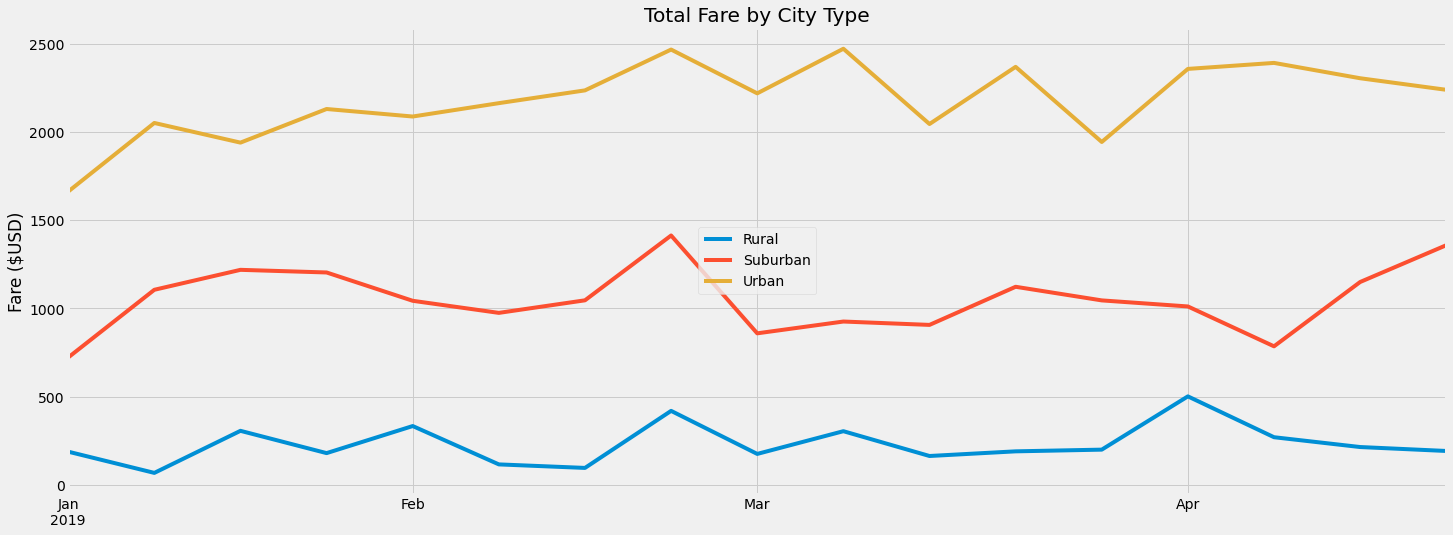

In [37]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

jan_thru_apr_line = jan_thru_apr_by_week_df.plot(kind='line', figsize=(22,8))
jan_thru_apr_line.legend(loc='center')
jan_thru_apr_line.set_title('Total Fare by City Type')
jan_thru_apr_line.set_xlabel('')
jan_thru_apr_line.set_ylabel('Fare ($USD)')

plt.savefig('analysis/PyBer_fare_summary.png')

plt.show()

# note: there is a slight discrepancy with this output and the line chart shown in the challenge instructions
# the instructions tell us to created a DataFrame for 2019-01-01 through 2019-04-28
# I am understanding the "through" part of the instructions to mean that all of 2019-04-28 is included
# however, the example in the challenge only shows up to, but not including, 2019-04-28
# https://courses.bootcampspot.com/courses/1269/files/1402689/preview

In [44]:
2405 / 1625

1.48